**This notebook consists of variety of plots to visulize and deduce outcomes from the datasets collected.**

Importing libraries to be used in future 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import json
plt.style.use('fivethirtyeight')

Loading the datasets containing the state wise vaccination details .

In [2]:
statePopulation=pd.read_csv('/content/statePopulation.csv')
stateVaccination=pd.read_csv('/content/stateWiseVaccination.csv')

Appearance of the the dataset 

In [3]:
stateVaccination.head()

,Unnamed: 0,state_id,id,title,state_name,total,partial_vaccinated,totally_vaccinated,today
0,0,1,1,Andaman and Nicobar Islands,Andaman and Nicobar Islands,129402,114098,15304,879
1,1,2,2,Andhra Pradesh,Andhra Pradesh,11472950,8868827,2604123,235131
2,2,3,3,Arunachal Pradesh,Arunachal Pradesh,400431,321529,78902,4350
3,3,4,4,Assam,Assam,4578353,3689625,888728,86530
4,4,5,5,Bihar,Bihar,11582563,9695656,1886907,164441


In [4]:
statePopulation=statePopulation.sort_values('Name')

In [5]:
pop_states=(statePopulation['Name'].unique())
states=[]
for i in stateVaccination['title'].unique():
      if(' AND ' in i.upper()):
        x=i.split(' ')
        states.append((x[0].upper()+' & '+x[2].upper()))
      else:
        states.append(i.upper())

In [6]:
notpresent=[]
for i in states :
    if(i not in pop_states and '&' not in i):
      notpresent.append(i[0]+i[1:].lower())
notpresent


['Chandigarh',
 'Delhi',
 'Haryana',
 'Ladakh',
 'Puducherry',
 'Punjab',
 'Telangana']

In [7]:
validStateVaccination=stateVaccination
for i in notpresent:
  validStateVaccination=validStateVaccination[validStateVaccination.state_name != i]

print(validStateVaccination.shape)
print(statePopulation.shape)

(30, 9)
(30, 90)


Giving a unique id for the states 

In [8]:
labelEncoder=LabelEncoder()
validStateVaccination['state_id']=labelEncoder.fit_transform(validStateVaccination['state_name'])
statePopulation['state_id']=labelEncoder.fit_transform(statePopulation['Name'])

In [9]:
statePopulation=statePopulation[['Name','state_id','TOT_P','TOT_M','TOT_F']]

In [10]:
validStateVaccination=validStateVaccination.merge(statePopulation,left_on='state_id',right_on='state_id')
validStateVaccination

,Unnamed: 0,state_id,id,title,state_name,total,partial_vaccinated,totally_vaccinated,today,Name,TOT_P,TOT_M,TOT_F
0,0,0,1,Andaman and Nicobar Islands,Andaman and Nicobar Islands,129402,114098,15304,879,ANDAMAN & NICOBAR ISLANDS,28530,14731,13799
1,1,1,2,Andhra Pradesh,Andhra Pradesh,11472950,8868827,2604123,235131,ANDHRA PRADESH,5918073,2969362,2948711
2,2,2,3,Arunachal Pradesh,Arunachal Pradesh,400431,321529,78902,4350,ARUNACHAL PRADESH,951821,468390,483431
3,3,3,4,Assam,Assam,4578353,3689625,888728,86530,ASSAM,3884371,1957005,1927366
4,4,4,5,Bihar,Bihar,11582563,9695656,1886907,164441,BIHAR,1336573,682516,654057
5,6,5,7,Chhattisgarh,Chhattisgarh,6311013,5162659,1148354,5777,CHHATTISGARH,7822902,3873191,3949711
6,7,6,8,Dadra and Nagar Haveli,Dadra and Nagar Haveli,113099,101087,12012,2391,DADRA & NAGAR HAVELI,178564,88844,89720
7,9,8,10,Goa,Goa,608544,511363,97181,7600,GOA,149275,72948,76327
8,10,9,11,Gujarat,Gujarat,19469285,15015883,4453402,263245,GUJARAT,8917174,4501389,4415785
9,12,10,13,Himachal Pradesh,Himachal Pradesh,2566312,2131032,435280,8279,HIMACHAL PRADESH,392126,196118,196008


The pie plot below shows the distribution of the vaccines among all the states of our country .More the angle covered ,more the vaccines delivered . Maharashtra ,karnataka ,Uttar pradesh, Gujarat ,West Bengal are the states that are receiving the highest number of jabs (on June 10th). 


click on the pie chart to zoom

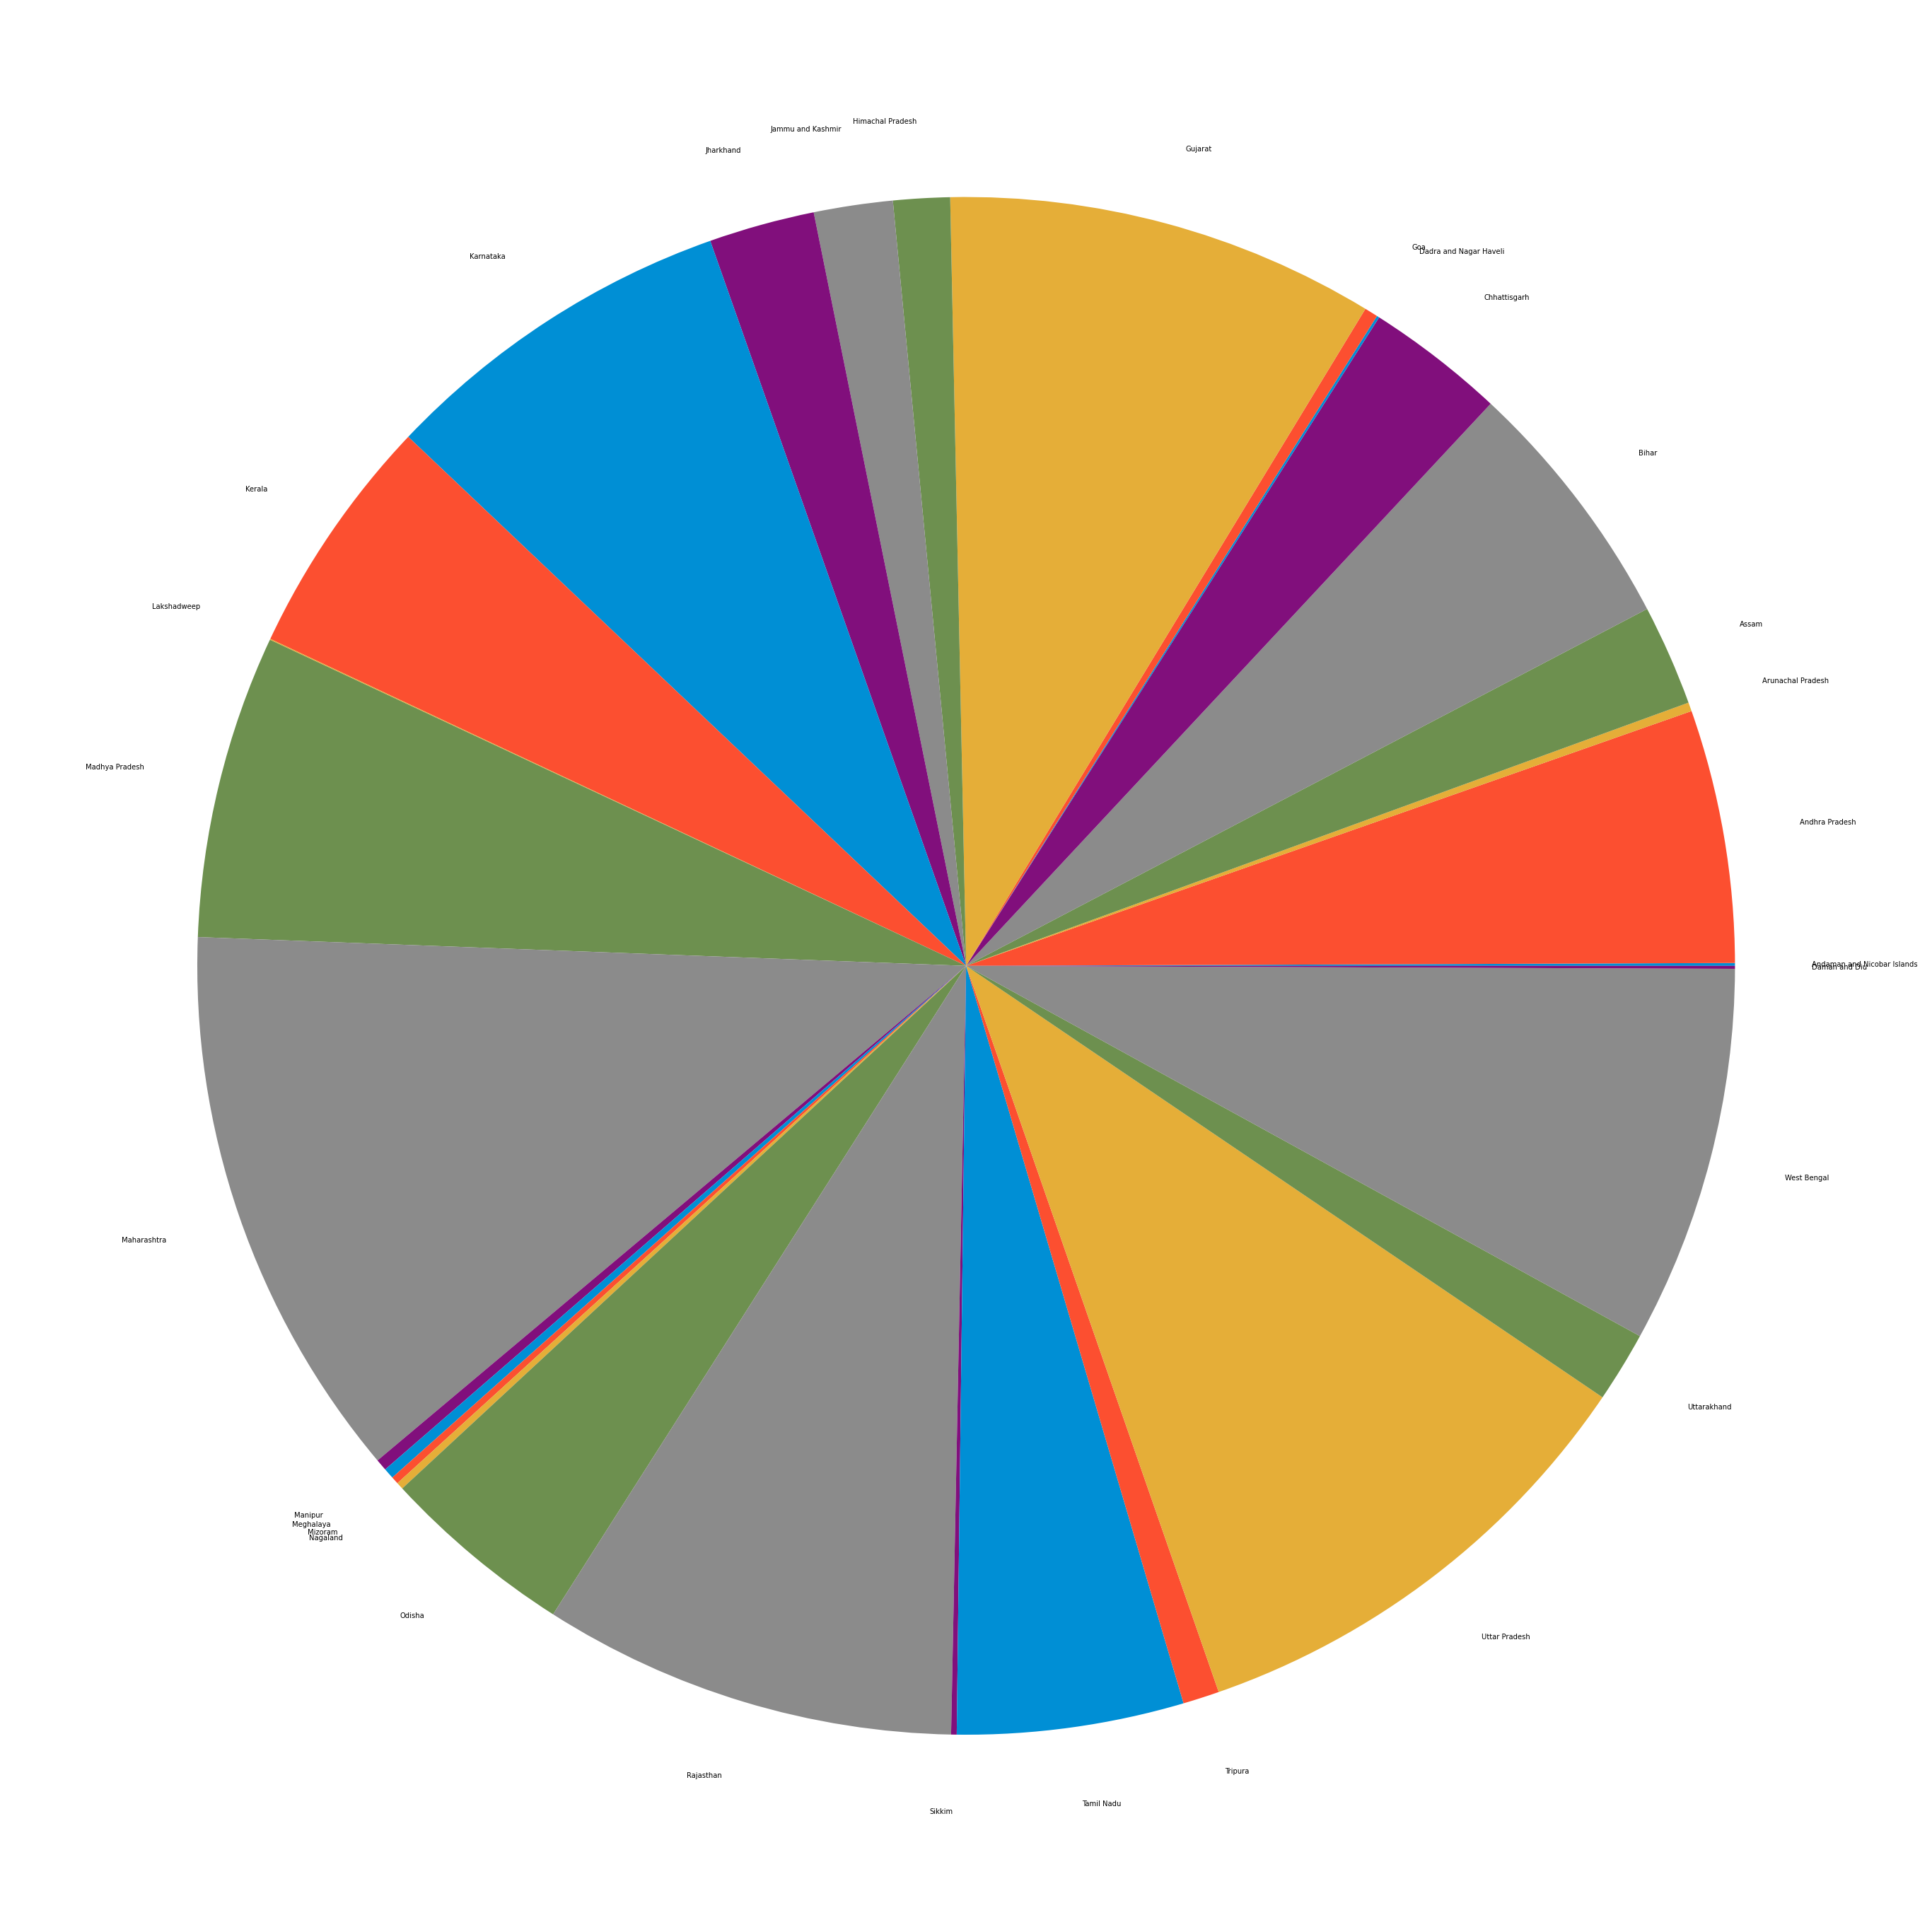

In [11]:
plt.figure(figsize=(50,50))
plt.pie(validStateVaccination['total'],labels=validStateVaccination['state_name'],explode=np.full_like(validStateVaccination['total'],0.9))
plt.show()

The Population data is taken from the internet

In [12]:
tot_males= 717100970
tot_females=662903415
tot_pop=1392753410 

**Loading the dataset that contains various information about vaccines delivered to males ,females and brands of vaccines delivered .**

In [13]:
vaccinationDetails=json.load(open('/content/vaccinationDetails'))

Appearance of the data in JSON form

In [14]:
vaccinationDetails

{'aefi': 21988,
 'covaxin': 28779994,
 'covishield': 212829323,
 'female': 90016903,
 'male': 105497135,
 'others': 33541,
 'sputnik': 21992,
 'today': 3099397,
 'today_aefi': 31,
 'today_dose_one': 2792752,
 'today_dose_two': 306645,
 'today_female': 1367315,
 'today_male': 1731226,
 'today_others': 854,
 'tot_dose_1': 195547579,
 'tot_dose_2': 46083730,
 'total': 195547579,
 'total_doses': 241631309}

**Immunization rate of Males in India .**

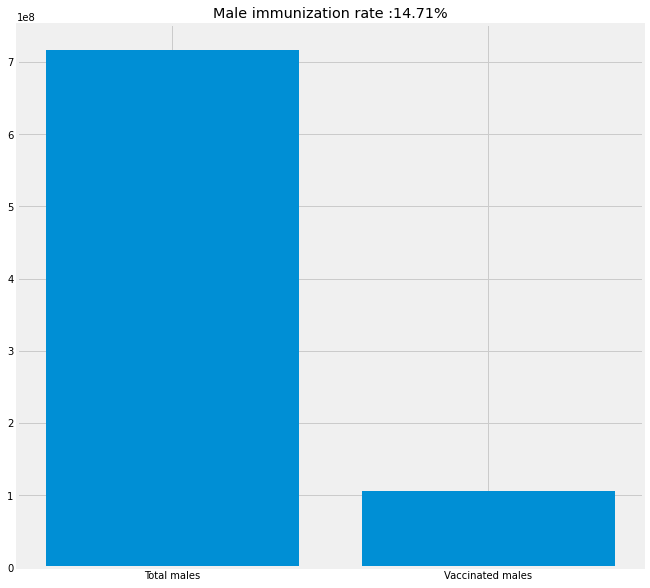

In [15]:

title=str("Male immunization rate :"+str(round(vaccinationDetails['male']/tot_males*100,2))+'%')
plt.figure(figsize=(10,10))
plt.bar(np.array(['Total males','Vaccinated males'],dtype=np.str),np.array([tot_males,vaccinationDetails['male']],dtype=np.int64),)
plt.title(title)
plt.show()


**Immunization rate of Females in India .**

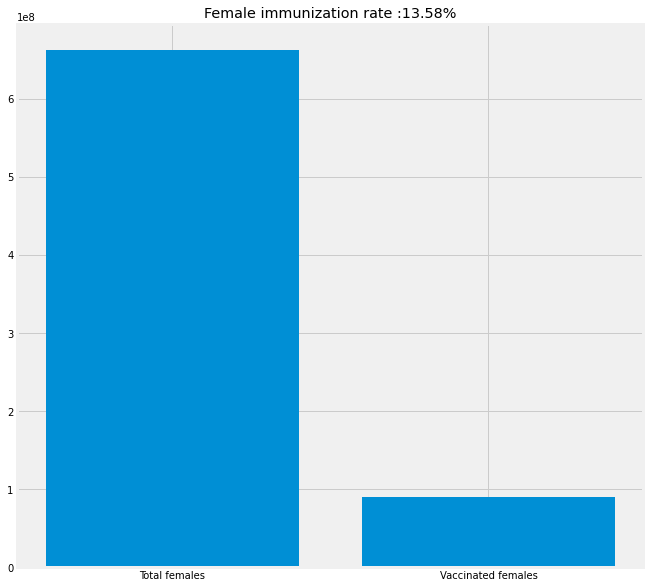

In [16]:
title="Female immunization rate :"+str(round(vaccinationDetails['female']/tot_females*100,2))+'%'
plt.figure(figsize=(10,10))
plt.bar(np.array(['Total females','Vaccinated females'],dtype=np.str),np.array([tot_females,vaccinationDetails['female']],dtype=np.int64),)
plt.title(title)
plt.show()

**Immunization rate population India .**

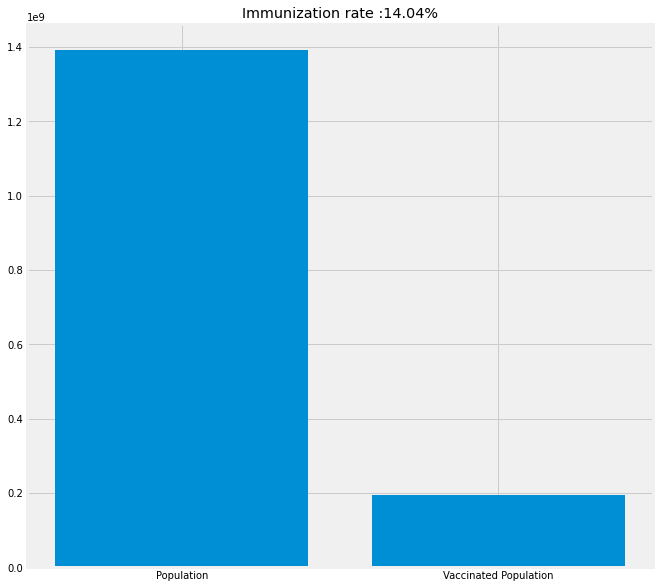

In [17]:
title="Immunization rate :"+str(round(vaccinationDetails['total']/tot_pop*100,2))+'%'
plt.figure(figsize=(10,10))
plt.bar(np.array(['Population','Vaccinated Population'],dtype=np.str),np.array([tot_pop,vaccinationDetails['total']],dtype=np.int64),)
plt.title(title)
plt.show()

**The percentage of females is slightly shorted compared to general vaccination trend of males in India**

Distribution of the different vaccine brands in India .
Clearly Covishield and Covaxin form 99% of the 3 vaccines used in India

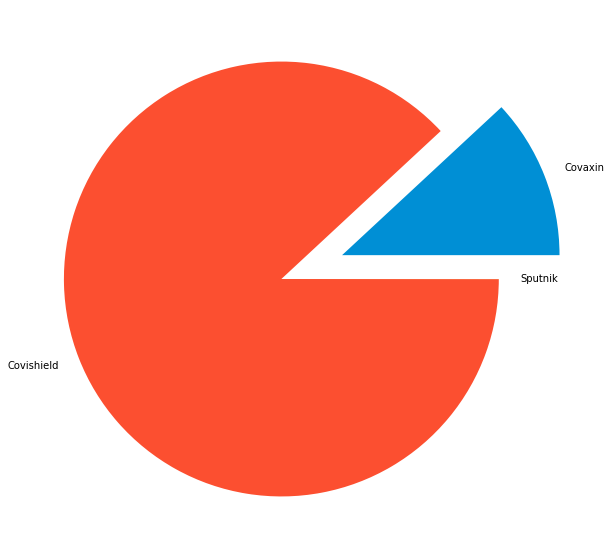

In [18]:
x=[]
plt.figure(figsize=(10,10))
x.append(vaccinationDetails['covaxin'])
x.append(vaccinationDetails['covishield'])
x.append(vaccinationDetails['sputnik'])
plt.pie(x,explode=[0.3,0,0],labels=['Covaxin','Covishield','Sputnik'])
plt.show()


The plot below :
 
Data regarding daily doses administered since April 1st until June 10th .
We can see a upward rise in the graph indicating ,the increase in production of the vaccines .**The plot of Good News**

In [19]:
vaccinationTrend=pd.read_csv('/content/DateWiseTotal.csv')

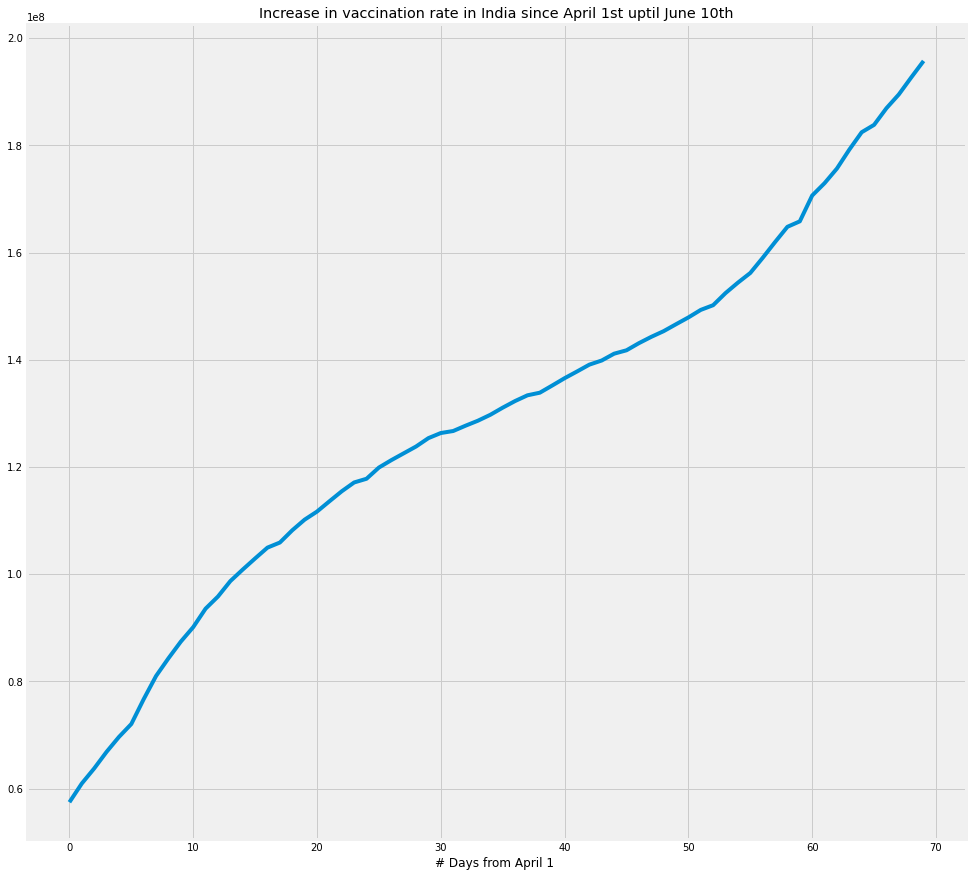

In [20]:
plt.figure(figsize=(15,15))
plt.plot(vaccinationTrend['total'],)
plt.xlabel('# Days from April 1 ')
plt.title('Increase in vaccination rate in India since April 1st uptil June 10th')
plt.show()

**Create a model to predict India's daily doses after n days**

In [21]:
from sklearn.linear_model import LinearRegression
vaccinationTrend['daysSinceApril1']=np.arange(1,len(vaccinationTrend['total'])+1)
model=LinearRegression()
model.fit(np.array(vaccinationTrend['daysSinceApril1']).reshape(-1, 1),np.array(vaccinationTrend['total']).reshape(-1, 1))
model.score(np.array(vaccinationTrend['daysSinceApril1']).reshape(-1, 1),np.array(vaccinationTrend['total']).reshape(-1, 1))

0.9709179458805245

Sample predictions from the model 

In [22]:
model.predict(np.array([3,60,61,62,90,100]).reshape(-1,1))

array([[7.47433554e+07],
       [1.69941742e+08],
       [1.71611889e+08],
       [1.73282036e+08],
       [2.20046156e+08],
       [2.36747628e+08]])

So for the input 100 ,it means 100 days past April 1st i.e July 11th India will administer around 236747628 doses of vaccines 

Thank you !
Please provide your feedback .